# Alex's Section

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

fema_decl = pd.read_csv('Assets/CSVs/femaDisasters_clean.csv')

In [29]:
grouped_data = fema_decl.groupby(['incidentType', 'state', 'declarationTitle']).size().reset_index(name='count')
grouped_data.head(15)

,incidentType,state,declarationTitle,count
0,Coastal Storm,AK,SEVERE STORM,2
1,Coastal Storm,CA,"COASTAL STORMS, FLOODS, SLIDES & TORNADOES",40
2,Coastal Storm,CA,"TORRENTIAL RAIN, HIGH TIDE & WINDS",3
3,Coastal Storm,CO,HURRICANE KATRINA EVACUATION,64
4,Coastal Storm,DE,SEVERE COASTAL STORM & FLOODING,1
5,Coastal Storm,FL,"SEVERE STORMS, TORNADOES AND FLOODING ASSOCIAT...",11
6,Coastal Storm,FL,TROPICAL STORM AGNES,14
7,Coastal Storm,LA,TROPICAL STORM ALLISON,27
8,Coastal Storm,LA,TROPICAL STORM BARRY,41
9,Coastal Storm,LA,TROPICAL STORM CRISTOBAL,64


In [30]:
disaster_by_state = fema_decl.groupby('state').size().reset_index(name='total_disasters')
disaster_by_state = disaster_by_state.sort_values(by='total_disasters', ascending=False)
disaster_by_state

,state,total_disasters
50,TX,4779
10,FL,2635
20,KY,2554
28,MO,2510
21,LA,2398
12,GA,2333
41,OK,2305
32,NC,2101
44,PR,1835
30,MS,1777


In [31]:
disaster_by_type = fema_decl.groupby(['state', 'incidentType']).size().reset_index(name='count')
disaster_by_type = disaster_by_type.sort_values(by='count', ascending=False)
disaster_by_type.head(25)

,state,incidentType,count
141,LA,Hurricane,1450
68,FL,Hurricane,1432
193,MO,Severe Storm,1387
342,TX,Hurricane,1370
215,NC,Hurricane,1300
339,TX,Fire,1229
134,KY,Severe Storm,1156
126,KS,Severe Storm,1095
284,OK,Severe Storm,1041
80,GA,Hurricane,1031


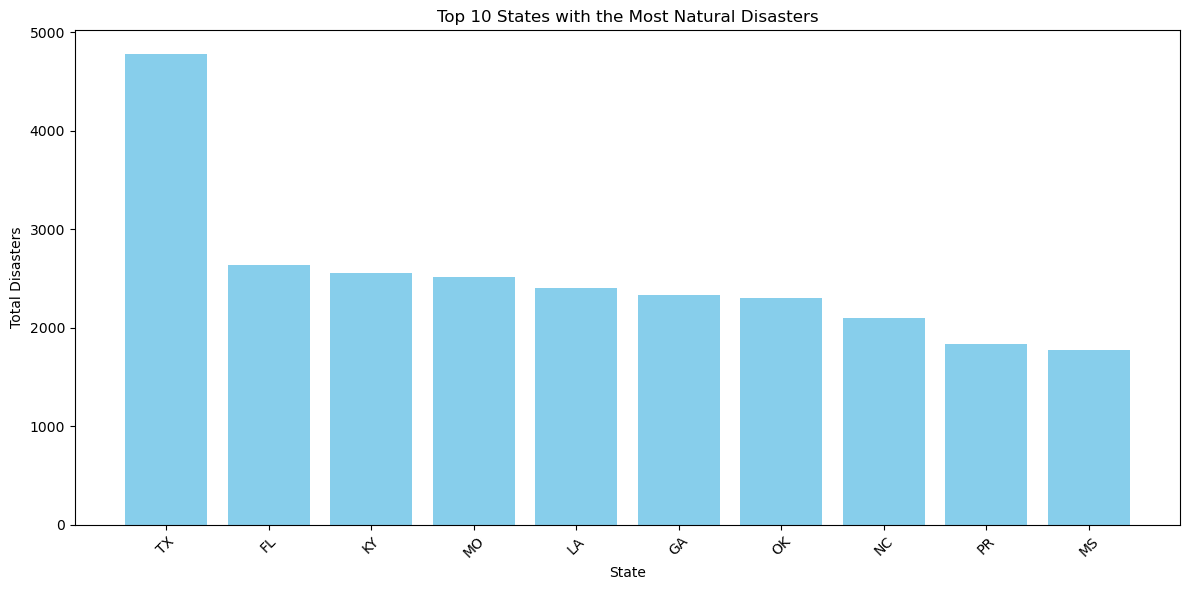

<Figure size 640x480 with 0 Axes>

In [32]:
top_states = disaster_by_state.head(10)
plt.figure(figsize=(12, 6))
plt.bar(top_states['state'], top_states['total_disasters'], color='skyblue')
plt.xlabel('State')
plt.ylabel('Total Disasters')
plt.title('Top 10 States with the Most Natural Disasters')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.savefig('Assets/Figures/Alex/Top10_States_MostDisasters')

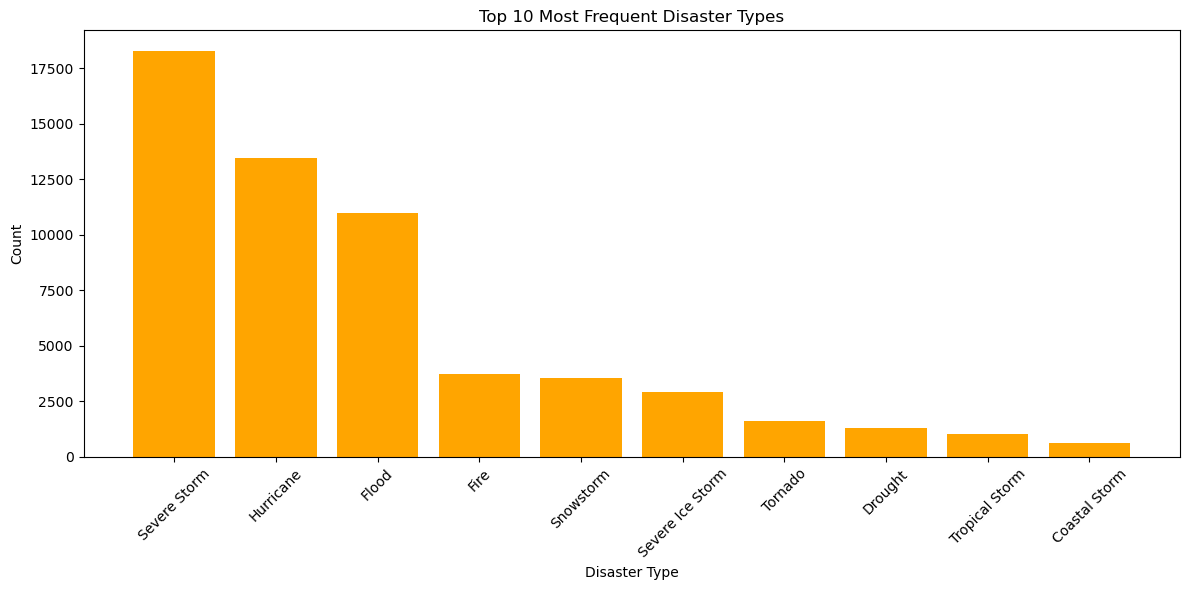

<Figure size 640x480 with 0 Axes>

In [33]:
top_disaster_types = disaster_by_type.groupby('incidentType')['count'].sum().reset_index()
top_disaster_types = top_disaster_types.sort_values(by='count', ascending=False).head(10)
plt.figure(figsize=(12, 6))
plt.bar(top_disaster_types['incidentType'], top_disaster_types['count'], color='orange')
plt.xlabel('Disaster Type')
plt.ylabel('Count')
plt.title('Top 10 Most Frequent Disaster Types')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.savefig('Assets/Figures/Alex/Top10_MostFrequent_Disasters')

In [34]:
most_common_disasters = disaster_by_type.loc[
    disaster_by_type.groupby('state')['count'].idxmax()]
most_common_disasters = most_common_disasters.sort_values(by='count', ascending=False)
most_common_disasters


,state,incidentType,count
141,LA,Hurricane,1450
68,FL,Hurricane,1432
193,MO,Severe Storm,1387
342,TX,Hurricane,1370
215,NC,Hurricane,1300
134,KY,Severe Storm,1156
126,KS,Severe Storm,1095
284,OK,Severe Storm,1041
80,GA,Hurricane,1031
304,PR,Hurricane,1024


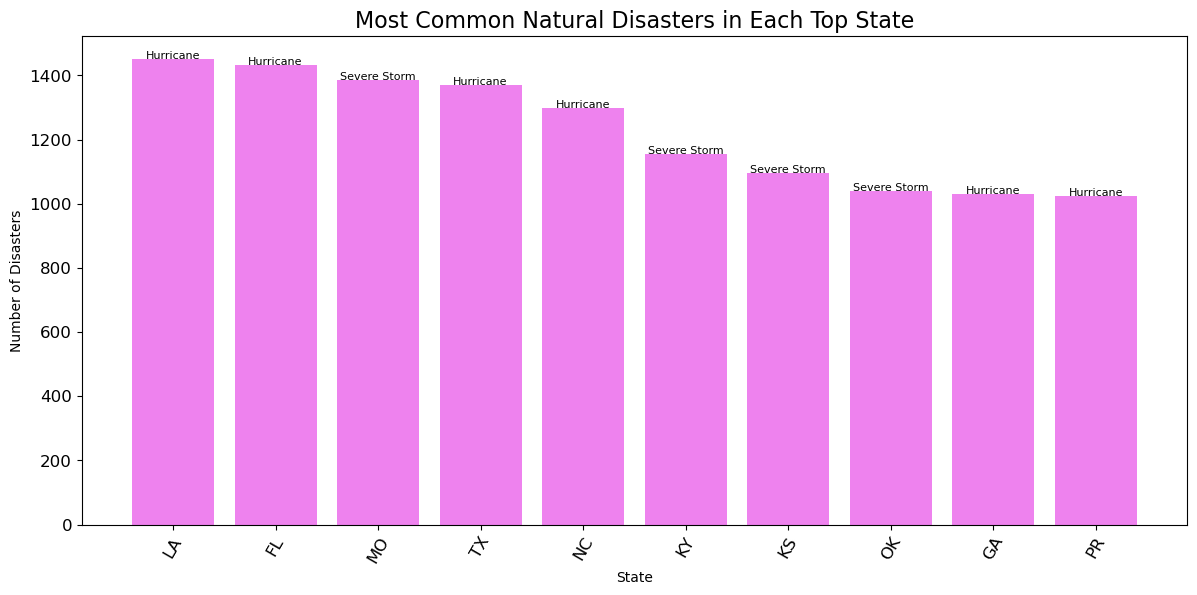

<Figure size 640x480 with 0 Axes>

In [35]:
top_states_disasters = most_common_disasters.head(10)
states = top_states_disasters['state']
disasters = top_states_disasters['incidentType']
counts = top_states_disasters['count']

plt.figure(figsize=(12, 6))
plt.bar(states, counts, color='violet')
for i, disaster in enumerate(disasters):
    plt.text(i, counts.iloc[i] + 0.5, disaster, ha='center', fontsize=8)
plt.xlabel('State')
plt.ylabel('Number of Disasters')
plt.title('Most Common Natural Disasters in Each Top State', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.xticks(rotation=60, fontsize=12)
plt.yticks(fontsize=12)
plt.show()
plt.savefig('Assets/Figures/Alex/MostCommonDisasters_byTopStates')

In [36]:
incident_counts = fema_decl['incidentType'].value_counts()
max_disasters = incident_counts.max()
min_disasters = incident_counts.min()
max_disaster_type = incident_counts.idxmax()
min_disaster_type = incident_counts.idxmin()
print(f"Maximum disasters: {max_disasters} ({max_disaster_type})")
print(f"Minimum disasters: {min_disasters} ({min_disaster_type})")

Maximum disasters: 18296 (Severe Storm)
Minimum disasters: 2 (Straight-Line Winds)


In [37]:
texas_disasters = fema_decl[fema_decl['state'] == 'TX']
num_texas_disasters = texas_disasters.shape[0]
print(f"Texas had {num_texas_disasters} natural disasters.")

Texas had 4779 natural disasters.


In [38]:
fema_decl['declarationDate'] = pd.to_datetime(fema_decl['declarationDate'], errors='coerce')
data = fema_decl.dropna(subset=['declarationDate'])
data['Month'] = fema_decl['declarationDate'].dt.month
def assign_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
data['Season'] = data['Month'].apply(assign_season)
monthly_counts = data['Month'].value_counts().sort_index()
seasonal_counts = data['Season'].value_counts()
print("Disaster Occurrences by Month:")
print(monthly_counts)

print("\nDisaster Occurrences by Season:")
print(seasonal_counts)

Disaster Occurrences by Month:
Month
1      4902
2      4404
3      5157
4      4484
5      4879
6      4830
7      4954
8      5730
9     11404
10     3823
11     1578
12     2018
Name: count, dtype: int64

Disaster Occurrences by Season:
Season
Fall      16805
Summer    15514
Spring    14520
Winter    11324
Name: count, dtype: int64


In [39]:
hurricane_counts = data[data['incidentType'] == 'Hurricane'].groupby('state').size()
most_hurricanes_state = hurricane_counts.idxmax()
most_hurricanes_count = hurricane_counts.max()
print(f"The state with the most hurricanes is {most_hurricanes_state} with {most_hurricanes_count} hurricanes.")


The state with the most hurricanes is LA with 1450 hurricanes.


In [40]:
severe_storm_counts = data[data['incidentType'] == 'Severe Storm'].groupby('state').size()
most_severe_storms_state = severe_storm_counts.idxmax()
most_severe_storms_count = severe_storm_counts.max()
print(f"The state with the most severe storms is {most_severe_storms_state} with {most_severe_storms_count} severe storms.")


The state with the most severe storms is MO with 1387 severe storms.
